Лабораторная работа 3

Тема: Метод главных компонент

Вариант 3 (beauty).

Задание.
Методом главных компонент построить два новых признака для описания объектов из датасета задания 2 и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации из задания 2 и из этого задания.

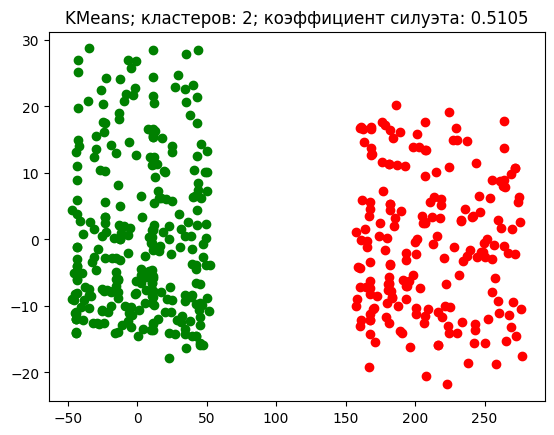

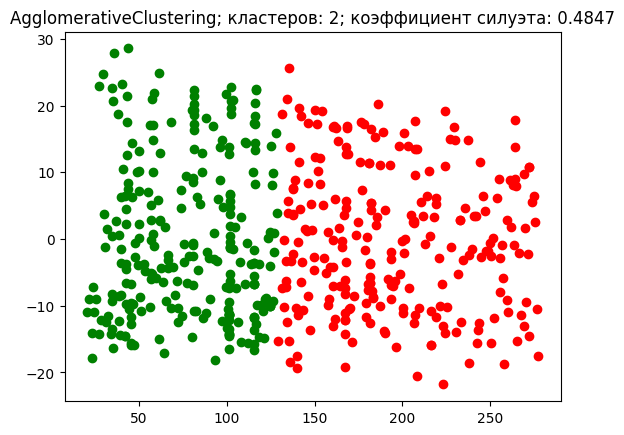

In [31]:
import pandas as pd
import numpy as np
import datetime
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Функция кластеризации данных с использованием PCA для снижения размерности
def clasterize_with_pca(clusters_amount, clastirize_method):
    # Чтение данных из CSV файла (ограничиваем выборку первыми 1200 строками)
    df = pd.read_csv('beauty.csv', sep=',')[:1200]

    # Определяем категории, которые будем использовать
    categories = ["wage", "exper", "educ", "looks"]

    # Преобразование категориальных признаков в числовые (факторизация)
    for category in categories:
        df[f'{category}_cat'] = pd.factorize(df[category], sort=True)[0]

    # Выбираем числовые и категориальные данные для дальнейшей обработки
    numer = df[["educ", "looks"]]
    cater = df[[f"{category}_cat" for category in categories]]

    # Масштабируем числовые данные с помощью StandardScaler
    scaler = StandardScaler()
    numer = pd.DataFrame(scaler.fit_transform(numer))
    numer.columns = ["educ_Scaled", "looks_Scaled"]

    # Объединяем числовые и категориальные данные в единый датафрейм
    X = pd.concat([numer, cater], axis=1, join='inner')

    # Настраиваем PCA для снижения размерности до 2-х признаков
    pca = PCA(n_components=2)

    # Получаем два новых признака после применения PCA
    pca_props = pd.DataFrame(pca.fit_transform(X))

    # Переименовываем колонки для удобства
    pca_props.columns = ["PCA 1", "PCA 2"]

    # Инициализируем метод кластеризации, переданный в функцию (KMeans или AgglomerativeClustering)
    clasterizer = clastirize_method(n_clusters=5)

    # Выполняем кластеризацию на данных после PCA
    clusters = clasterizer.fit_predict(pca_props)

    # Получаем метки кластеров
    labels = clasterizer.labels_

    # Рассчитываем коэффициент силуэта для оценки качества кластеризации
    silhouette_avg = silhouette_score(X, labels)

    # Добавляем информацию о кластере в датасет
    X["Cluster"] = clusters

    # Объединяем исходные данные, PCA-признаки и метки кластеров в один датафрейм
    X = pd.concat([X, df, pca_props], axis=1, join='inner')

    # Подготавливаем данные для визуализации
    plotX = pd.DataFrame(np.array(X))
    plotX.columns = X.columns

    # Определяем цвета для отображения кластеров
    colors = ["red", "green", "blue", "black"]

    # Визуализируем каждый кластер на графике
    for i in range(0, clusters_amount):
        cluster = plotX[plotX["Cluster"] == i]
        plt.scatter(
            x=cluster["PCA 1"],
            y=cluster["PCA 2"],
            c=colors[i % len(colors)],
        )

    # Настраиваем заголовок графика с указанием метода, количества кластеров и коэффициента силуэта
    plt.title(f"{clastirize_method.__name__}; кластеров: {clusters_amount}; коэффициент силуэта: {silhouette_avg:.4f}")

    # Показываем график
    plt.show()

# Запуск функции с двумя разными методами кластеризации
clasterize_with_pca(2, KMeans)
clasterize_with_pca(2, AgglomerativeClustering)


Вывод: Метод главных компонент сократил количество свойств до 2, что позволило  увеличить выборку и повысить качество кластеризации. Коэффициент силуэта изменился для Kmeans с 0.4545 до 0.5105 и у Agglomerative с 0.4082 до 0.4847. Связано это с большим размером выборки.